In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from deepsky.data import load_storm_patch_data
from deepsky.gan import normalize_multivariate_data, stack_gen_disc, stack_enc_gen, train_gan_quiet, stack_gen_enc
from deepsky.models import LogisticGAN
from keras.models import Sequential, Model
from keras.layers import Conv2D, Conv2DTranspose, Flatten, Dense, Input, UpSampling2D, MaxPool2D, BatchNormalization
from keras.layers import Activation, Reshape, LeakyReLU, concatenate, Dropout, GaussianNoise, AveragePooling2D
from keras.regularizers import l2
from keras.optimizers import Adam
import keras.backend as K


In [8]:
data_path = "/users/dgagne/ncar_ens_storm_patches/"


In [2]:
variables = ["composite_reflectivity_entire_atmosphere_current"]
all_data, all_meta = load_storm_patch_data(data_path, variables, 2)

/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_01.nc 640
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_02.nc 950
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_03.nc 760
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_04.nc 650
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_05.nc 605
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_06.nc 835
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_07.nc 760
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_08.nc 805
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_09.nc 900
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_10.nc 700
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050400_mem_01.nc 460
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_20160

/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051200_mem_07.nc 1265
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051200_mem_08.nc 1270
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051200_mem_09.nc 1185
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051200_mem_10.nc 1470
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_01.nc 1020
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_02.nc 1140
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_03.nc 995
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_04.nc 825
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_05.nc 1025
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_06.nc 1110
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_07.nc 1000
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patc

/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_03.nc 2220
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_04.nc 2065
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_05.nc 2160
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_06.nc 2530
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_07.nc 2415
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_08.nc 2270
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_09.nc 1870
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_10.nc 2415
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052300_mem_01.nc 2445
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052300_mem_02.nc 3000
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052300_mem_03.nc 2375
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_pa

/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016053100_mem_09.nc 2395
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016053100_mem_10.nc 2805
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_01.nc 2000
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_02.nc 1850
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_03.nc 1955
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_04.nc 1840
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_05.nc 1780
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_06.nc 1520
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_07.nc 1990
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_08.nc 2110
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_09.nc 1850
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_pa

In [5]:
storm_norm_data, storm_scaling_values = normalize_multivariate_data(all_data)

In [10]:
output_data, output_meta = load_storm_patch_data(data_path,
                                                     ["thompson_max_hail_k1_surface_current",
                                                      "mask"], 4)
max_hail = np.array([output_data[i, :, :, 0][output_data[i, :, :, 1] > 0].max()
                         for i in range(output_data.shape[0])])
max_hail *= 1000
hail_labels = np.where(max_hail >= 25, 1, 0)

/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_02.nc 950
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_03.nc 760
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_01.nc 640
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_04.nc 650
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_05.nc 605
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_07.nc 760
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_06.nc 835
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_08.nc 805
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_09.nc 900
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050300_mem_10.nc 700
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016050400_mem_02.nc 325
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_20160

/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051200_mem_07.nc 1265
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051200_mem_08.nc 1270
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051200_mem_09.nc 1185
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_01.nc 1020
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051200_mem_10.nc 1470
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_02.nc 1140
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_03.nc 995
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_04.nc 825
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_05.nc 1025
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_06.nc 1110
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016051300_mem_07.nc 1000
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patc

/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_02.nc 2170
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_03.nc 2220
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_05.nc 2160
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_06.nc 2530
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_07.nc 2415
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_09.nc 1870
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_08.nc 2270
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052200_mem_10.nc 2415
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052300_mem_01.nc 2445
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052300_mem_02.nc 3000
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016052300_mem_03.nc 2375
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_pa

/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016053100_mem_09.nc 2395
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016053100_mem_10.nc 2805
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_01.nc 2000
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_02.nc 1850
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_04.nc 1840
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_03.nc 1955
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_05.nc 1780
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_06.nc 1520
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_07.nc 1990
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_08.nc 2110
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_patches_2016060100_mem_09.nc 1850
/users/dgagne/ncar_ens_storm_patches/ncar_ens_storm_pa

In [11]:
lg = LogisticGAN(data_width=32, num_input_channels=1, filter_width=5, min_conv_filters=32, activation="leaky",
                 use_noise=True, noise_sd=0.1, stride=1, pooling="mean", batch_size=512, num_epochs=20)

ValueError: Input 0 is incompatible with layer dense_2: expected axis -1 of input shape to have value 2048 but got shape (None, 512)

In [143]:
def generator_model(input_size=100, filter_width=5, min_data_width=4,
                    min_conv_filters=64, output_size=(32, 32, 1), stride=2, activation="relu",
                    use_dropout=False, dropout_alpha=0,
                    use_noise=False, noise_sd=0.1):
    """
    Creates a generator convolutional neural network for a generative adversarial network set. The keyword arguments
    allow aspects of the structure of the generator to be tuned for optimal performance.

    Args:
        input_size (int): Number of nodes in the input layer.
        filter_width (int): Width of each convolutional filter
        min_data_width (int): Width of the first convolved layer after the input layer
        min_conv_filters (int): Number of convolutional filters in the last convolutional layer
        output_size (tuple of size 3): Dimensions of the output
        stride (int): Number of pixels that the convolution filter shifts between operations.
        activation (str): Type of activation used for convolutional layers. Use "leaky" for Leaky ReLU.
        output_activation (str): Type of activation used on the output layer
        use_dropout (bool): Whether to use Dropout layers or not.
        dropout_alpha (float): proportion of nodes dropped out.
        use_noise: Whether to use a Gaussian noise layer after a convolution.
        noise_sd: Standard deviation of the Gaussian noise.

    Returns:
        Model output graph, model input
    """
    num_layers = int(np.log2(output_size[0]) - np.log2(min_data_width))
    max_conv_filters = int(min_conv_filters * 2 ** (num_layers))
    curr_conv_filters = max_conv_filters
    vector_input = Input(shape=(input_size, ), name="gen_input")
    model = Dense(units=max_conv_filters * min_data_width * min_data_width, kernel_regularizer=l2(0.001))(vector_input)
    model = Reshape((min_data_width, min_data_width, max_conv_filters))(model)
    if activation == "leaky":
        model = LeakyReLU(alpha=0.2)(model)
    else:
        model = Activation(activation)(model)
    for i in range(num_layers):
        curr_conv_filters //= 2
        model = Conv2DTranspose(curr_conv_filters, (filter_width, filter_width),
                                strides=(stride, stride), padding="same", kernel_regularizer=l2())(model)
        if activation == "leaky":
            model = LeakyReLU(alpha=0.2)(model)
        else:
            model = Activation(activation)(model)
        if use_dropout:
            model = Dropout(dropout_alpha)(model)
        if use_noise:
            model = GaussianNoise(noise_sd)(model)
        if stride == 1:
            model = UpSampling2D()(model)
    model = Conv2DTranspose(output_size[-1], (filter_width, filter_width),
                            strides=(1, 1),
                            padding="same", kernel_regularizer=l2())(model)
    model_out = Model(vector_input, model)
    return model_out


def encoder_model(input_size=(32, 32, 1), filter_width=5, min_data_width=4,
                  min_conv_filters=64, output_size=100, stride=2, activation="relu", output_activation="linear",
                  use_dropout=False, dropout_alpha=0, use_noise=False, noise_sd=0.1, pooling="mean"):
    """
    Creates an encoder convolutional neural network that reproduces the generator input vector. The keyword arguments
    allow aspects of the structure of the generator to be tuned for optimal performance.

    Args:
        input_size (tuple of ints): Number of nodes in the input layer.
        filter_width (int): Width of each convolutional filter
        min_data_width (int): Width of the last convolved layer
        min_conv_filters (int): Number of convolutional filters in the first convolutional layer
        output_size (int): Dimensions of the output
        stride (int): Number of pixels that the convolution filter shifts between operations.
        activation (str): Type of activation used for convolutional layers. Use "leaky" for Leaky ReLU.
        output_activation (str): Type of activation used on the output layer
        use_dropout (bool): Whether to use Dropout layers or not.
        dropout_alpha (float): proportion of nodes dropped out.
        use_noise (bool): Whether to use a Gaussian noise layer after a convolution.
        noise_sd (float): Standard deviation of the Gaussian noise.
        pooling (str): Type of pooling to use if stride=1. Options: "mean" or "max".
    Returns:
        Keras convolutional neural network.
    """
    num_layers = int(np.log2(input_size[0]) - np.log2(min_data_width))
    curr_conv_filters = min_conv_filters
    image_input = Input(shape=input_size, name="enc_input")
    model = None
    for c in range(num_layers):
        if c == 0:
            model = Conv2D(curr_conv_filters, (filter_width, filter_width),
                           strides=(stride, stride), padding="same", kernel_regularizer=l2())(image_input)
        else:
            model = Conv2D(curr_conv_filters, (filter_width, filter_width),
                           strides=(stride, stride), padding="same", kernel_regularizer=l2())(model)
        if activation == "leaky":
            model = LeakyReLU(0.2)(model)
        else:
            model = Activation(activation)(model)
        if use_dropout:
            model = Dropout(dropout_alpha)(model)
        if use_noise:
            model = GaussianNoise(noise_sd)(model)
        if stride == 1:
            if pooling.lower() == "mean":
                model = AveragePooling2D()(model)
            else:
                model = MaxPool2D()(model)
        curr_conv_filters *= 2
    model = Conv2D(curr_conv_filters, (filter_width, filter_width),
                       strides=(1, 1), padding="same", kernel_regularizer=l2())(model)
    model = Flatten()(model)
    model = Dense(output_size)(model)
    model = Activation(output_activation)(model)
    model_out = Model(image_input, model)
    return model_out


def discriminator_model(input_size=(32, 32, 1), stride=2, filter_width=5,
                        min_conv_filters=64, min_data_width=4, activation="relu",
                        use_dropout=False, dropout_alpha=0, use_noise=False, noise_sd=0,
                        pooling="mean"):
    """
    Creates an discriminator convolutional neural network that reproduces the generator input vector.
    The keyword arguments allow aspects of the structure of the discriminator to be tuned for optimal performance.

    Args:
        input_size (tuple of ints): Number of nodes in the input layer.
        filter_width (int): Width of each convolutional filter
        min_data_width (int): Width of the last convolved layer
        min_conv_filters (int): Number of convolutional filters in the first convolutional layer
        stride (int): Number of pixels that the convolution filter shifts between operations.
        activation (str): Type of activation used for convolutional layers. Use "leaky" for Leaky ReLU.
        use_dropout (bool): Whether to use Dropout layers or not.
        dropout_alpha (float): proportion of nodes dropped out.
        use_noise (bool): Whether to use a Gaussian noise layer after a convolution.
        noise_sd (float): Standard deviation of the Gaussian noise.
        pooling (str): Type of pooling to use if stride=1. Options: "mean" or "max".

    Returns:
        discriminator model output, encoder model output, image input
    """
    num_layers = int(np.log2(input_size[0]) - np.log2(min_data_width))
    curr_conv_filters = min_conv_filters
    image_input = Input(shape=input_size, name="enc_input")
    for c in range(num_layers):
        if c == 0:
            model = Conv2D(curr_conv_filters, (filter_width, filter_width),
                       strides=(stride, stride), padding="same", kernel_regularizer=l2())(image_input)
        else:
            model = Conv2D(curr_conv_filters, (filter_width, filter_width),
                       strides=(stride, stride), padding="same", kernel_regularizer=l2())(model)
        if activation == "leaky":
            model = LeakyReLU(0.2)(model)
        else:
            model = Activation(activation)(model)
        if use_dropout:
            model = Dropout(dropout_alpha)(model)
        if use_noise:
            model = GaussianNoise(noise_sd)(model)
        if stride == 1:
            if pooling.lower() == "mean":
                model = AveragePooling2D()(model)
            else:
                model = MaxPool2D()(model)
        curr_conv_filters *= 2
    model = Conv2D(curr_conv_filters, (filter_width, filter_width),
                       strides=(1, 1), padding="same", kernel_regularizer=l2())(model)
    model = Flatten()(model)
    disc_model = Dense(1)(model)
    disc_model = Activation("sigmoid")(disc_model)
    model_out = Model(image_input, disc_model)
    return model_out

In [153]:
gen = generator_model(min_conv_filters=16, min_data_width=8, stride=1, use_noise=True, noise_sd=0.1)
disc = discriminator_model(min_conv_filters=16, min_data_width=8, stride=1, use_noise=True, noise_sd=0.1)
enc = encoder_model(min_conv_filters=16, min_data_width=8, stride=1, use_noise=True, noise_sd=0.1)

In [154]:
opt = Adam(lr=0.0001, beta_1=0.5, beta_2=0.9, amsgrad=False)
gen.compile(optimizer=opt, loss="mse")
disc.compile(optimizer=opt, loss="binary_crossentropy")
enc.compile(optimizer=opt, loss="mse")

In [146]:
def stack_gen_disc(generator, discriminator):
    """
    Combines generator and discrminator layers together while freezing the weights of the discriminator layers.

    Args:
        generator (Keras Model object): Generator model
        discriminator (Keras Model object): Discriminator model

    Returns:
        Generator layers attached to discriminator layers.
    """
    discriminator.trainable = False
    model = discriminator(generator.output)
    model_obj = Model(generator.input, model)
    return model_obj


def stack_gen_enc(generator, encoder):
    """
    Combines generator and encoder layers together while freezing the weights of the generator layers.
    This is used to train the encoder network to convert image data into a low-dimensional vector
     representation.

    Args:
        generator: Decoder network
        encoder: Encoder network
    Returns:
        Encoder layers attached to generator layers
    """
    generator.trainable = False
    model = encoder(generator.output)
    model_obj = Model(generator.input, model)
    return model_obj

In [129]:
gen.input

<tf.Tensor 'gen_input_17:0' shape=(?, 100) dtype=float32>

In [155]:
gen_disc = stack_gen_disc(gen, disc)
gen_disc.compile(optimizer=opt, loss="binary_crossentropy")
gen_enc = stack_gen_enc(gen, enc)
gen_enc.compile(optimizer=opt, loss="mse")

In [148]:
gen.trainable

False

In [135]:
def train_gan_quiet(all_train_data, generator, discriminator, gen_disc, gen_enc, vec_size,
                    batch_size, num_epochs, gan_index):
    batch_size = int(batch_size)
    batch_half = int(batch_size // 2)
    batch_diff = all_train_data.shape[0] % batch_size
    train_data = all_train_data[:-batch_diff]
    train_order = np.arange(train_data.shape[0])
    batch_labels = np.zeros(batch_size, dtype=np.float32)
    batch_labels[:batch_half] = 1
    gen_labels = np.ones(batch_size, dtype=np.float32)
    batch_vec = np.zeros((batch_size, vec_size))
    gen_batch_vec = np.zeros((batch_size, vec_size), dtype=train_data.dtype)
    enc_batch_vec = np.zeros((batch_size, vec_size), dtype=train_data.dtype)
    combo_data_batch = np.zeros(np.concatenate([[batch_size], train_data.shape[1:]]), dtype=np.float32)
    disc_loss_history = []
    gen_loss_history = []
    for epoch in range(1, num_epochs + 1):
        np.random.shuffle(train_order)
        for b, b_index in enumerate(np.arange(batch_half, train_data.shape[0] + batch_half, batch_half)):
            batch_vec[:] = np.random.normal(size=(batch_size, vec_size))
            gen_batch_vec[:] = np.random.normal(size=(batch_size, vec_size))
            combo_data_batch[:batch_half] = train_data[train_order[b_index - batch_half: b_index]]
            combo_data_batch[batch_half:] = generator.predict_on_batch(batch_vec[batch_half:])
            disc_loss_history.append(discriminator.train_on_batch(combo_data_batch, batch_labels))
            disc_preds = discriminator.predict_on_batch(combo_data_batch)
           # print("Disc Combo: {0} Max: {1}, Min {2}, LMax: {3}, LMin: {4}".format(gan_index, disc_preds.max(), disc_preds.min(), batch_labels.max(), batch_labels.min()))
            if b % 10 == 0:
                print("Disc Combo: {0} Epoch: {1} Batch: {2} Loss: {3:0.5f}".format(gan_index,
                                                                                epoch, b,
                                                                                disc_loss_history[-1]))
            gen_loss_history.append(gen_disc.train_on_batch(gen_batch_vec,
                                                            gen_labels))
            if b % 10 == 0:
                print("Gen Combo: {0} Epoch: {1} Batch: {2} Loss: {3:0.5f}".format(gan_index,
                                                                               epoch, b,
                                                                               gen_loss_history[-1]))
    
    gen_inputs = np.random.normal(size=(train_data.shape[0], vec_size))
    print("Fit Encoder Combo: {0}".format(gan_index))
    #gen_enc.fit(gen_inputs, gen_inputs, epochs=num_epochs, verbose=2)

In [156]:
train_gan_quiet(storm_norm_data, gen, disc, gen_disc, gen_enc, 100, 512, 6, 0)

/users/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/keras/engine/training.py:478: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Disc Combo: 0 Epoch: 1 Batch: 0 Loss: 1.35406
Gen Combo: 0 Epoch: 1 Batch: 0 Loss: 2.20096
Disc Combo: 0 Epoch: 1 Batch: 10 Loss: 1.23931
Gen Combo: 0 Epoch: 1 Batch: 10 Loss: 2.12244
Disc Combo: 0 Epoch: 1 Batch: 20 Loss: 1.13650
Gen Combo: 0 Epoch: 1 Batch: 20 Loss: 2.03627
Disc Combo: 0 Epoch: 1 Batch: 30 Loss: 1.29680
Gen Combo: 0 Epoch: 1 Batch: 30 Loss: 1.79820
Disc Combo: 0 Epoch: 1 Batch: 40 Loss: 1.12253
Gen Combo: 0 Epoch: 1 Batch: 40 Loss: 2.09748
Disc Combo: 0 Epoch: 1 Batch: 50 Loss: 1.08691
Gen Combo: 0 Epoch: 1 Batch: 50 Loss: 2.04904
Disc Combo: 0 Epoch: 1 Batch: 60 Loss: 1.30940
Gen Combo: 0 Epoch: 1 Batch: 60 Loss: 1.83005
Disc Combo: 0 Epoch: 1 Batch: 70 Loss: 1.19478
Gen Combo: 0 Epoch: 1 Batch: 70 Loss: 1.86351
Disc Combo: 0 Epoch: 1 Batch: 80 Loss: 1.17562
Gen Combo: 0 Epoch: 1 Batch: 80 Loss: 1.81699
Disc Combo: 0 Epoch: 1 Batch: 90 Loss: 1.11229
Gen Combo: 0 Epoch: 1 Batch: 90 Loss: 1.95424
Disc Combo: 0 Epoch: 1 Batch: 100 Loss: 1.10604
Gen Combo: 0 Epoch: 1 Ba

Disc Combo: 0 Epoch: 2 Batch: 420 Loss: 1.30845
Gen Combo: 0 Epoch: 2 Batch: 420 Loss: 1.54971
Disc Combo: 0 Epoch: 2 Batch: 430 Loss: 0.88151
Gen Combo: 0 Epoch: 2 Batch: 430 Loss: 2.02173
Disc Combo: 0 Epoch: 2 Batch: 440 Loss: 0.96243
Gen Combo: 0 Epoch: 2 Batch: 440 Loss: 1.90123
Disc Combo: 0 Epoch: 3 Batch: 0 Loss: 1.11697
Gen Combo: 0 Epoch: 3 Batch: 0 Loss: 1.59768
Disc Combo: 0 Epoch: 3 Batch: 10 Loss: 0.88594
Gen Combo: 0 Epoch: 3 Batch: 10 Loss: 2.07294
Disc Combo: 0 Epoch: 3 Batch: 20 Loss: 0.90924
Gen Combo: 0 Epoch: 3 Batch: 20 Loss: 2.20411
Disc Combo: 0 Epoch: 3 Batch: 30 Loss: 1.28501
Gen Combo: 0 Epoch: 3 Batch: 30 Loss: 2.17954
Disc Combo: 0 Epoch: 3 Batch: 40 Loss: 0.90238
Gen Combo: 0 Epoch: 3 Batch: 40 Loss: 1.95903
Disc Combo: 0 Epoch: 3 Batch: 50 Loss: 1.18118
Gen Combo: 0 Epoch: 3 Batch: 50 Loss: 1.70347
Disc Combo: 0 Epoch: 3 Batch: 60 Loss: 1.34797
Gen Combo: 0 Epoch: 3 Batch: 60 Loss: 1.81122
Disc Combo: 0 Epoch: 3 Batch: 70 Loss: 1.08963
Gen Combo: 0 Epoch:

Disc Combo: 0 Epoch: 4 Batch: 390 Loss: 0.85509
Gen Combo: 0 Epoch: 4 Batch: 390 Loss: 1.25791
Disc Combo: 0 Epoch: 4 Batch: 400 Loss: 0.82837
Gen Combo: 0 Epoch: 4 Batch: 400 Loss: 1.24489
Disc Combo: 0 Epoch: 4 Batch: 410 Loss: 0.87304
Gen Combo: 0 Epoch: 4 Batch: 410 Loss: 1.05292
Disc Combo: 0 Epoch: 4 Batch: 420 Loss: 0.84469
Gen Combo: 0 Epoch: 4 Batch: 420 Loss: 1.13757
Disc Combo: 0 Epoch: 4 Batch: 430 Loss: 0.82260
Gen Combo: 0 Epoch: 4 Batch: 430 Loss: 1.19814
Disc Combo: 0 Epoch: 4 Batch: 440 Loss: 0.83735
Gen Combo: 0 Epoch: 4 Batch: 440 Loss: 1.15568
Disc Combo: 0 Epoch: 5 Batch: 0 Loss: 0.81447
Gen Combo: 0 Epoch: 5 Batch: 0 Loss: 1.24179
Disc Combo: 0 Epoch: 5 Batch: 10 Loss: 0.80145
Gen Combo: 0 Epoch: 5 Batch: 10 Loss: 1.18782
Disc Combo: 0 Epoch: 5 Batch: 20 Loss: 0.83409
Gen Combo: 0 Epoch: 5 Batch: 20 Loss: 1.03202
Disc Combo: 0 Epoch: 5 Batch: 30 Loss: 0.83193
Gen Combo: 0 Epoch: 5 Batch: 30 Loss: 1.27363
Disc Combo: 0 Epoch: 5 Batch: 40 Loss: 0.84592
Gen Combo: 0 

Disc Combo: 0 Epoch: 6 Batch: 360 Loss: 0.74374
Gen Combo: 0 Epoch: 6 Batch: 360 Loss: 0.79536
Disc Combo: 0 Epoch: 6 Batch: 370 Loss: 0.73970
Gen Combo: 0 Epoch: 6 Batch: 370 Loss: 0.84627
Disc Combo: 0 Epoch: 6 Batch: 380 Loss: 0.72013
Gen Combo: 0 Epoch: 6 Batch: 380 Loss: 0.90373
Disc Combo: 0 Epoch: 6 Batch: 390 Loss: 0.74457
Gen Combo: 0 Epoch: 6 Batch: 390 Loss: 0.84847
Disc Combo: 0 Epoch: 6 Batch: 400 Loss: 0.74169
Gen Combo: 0 Epoch: 6 Batch: 400 Loss: 0.94926
Disc Combo: 0 Epoch: 6 Batch: 410 Loss: 0.73571
Gen Combo: 0 Epoch: 6 Batch: 410 Loss: 0.95871
Disc Combo: 0 Epoch: 6 Batch: 420 Loss: 0.73188
Gen Combo: 0 Epoch: 6 Batch: 420 Loss: 0.86709
Disc Combo: 0 Epoch: 6 Batch: 430 Loss: 0.72935
Gen Combo: 0 Epoch: 6 Batch: 430 Loss: 0.81117
Disc Combo: 0 Epoch: 6 Batch: 440 Loss: 0.73753
Gen Combo: 0 Epoch: 6 Batch: 440 Loss: 0.88999
Fit Encoder Combo: 0


In [188]:
gen_samples = gen.predict(np.random.normal(size=(9, 100)))

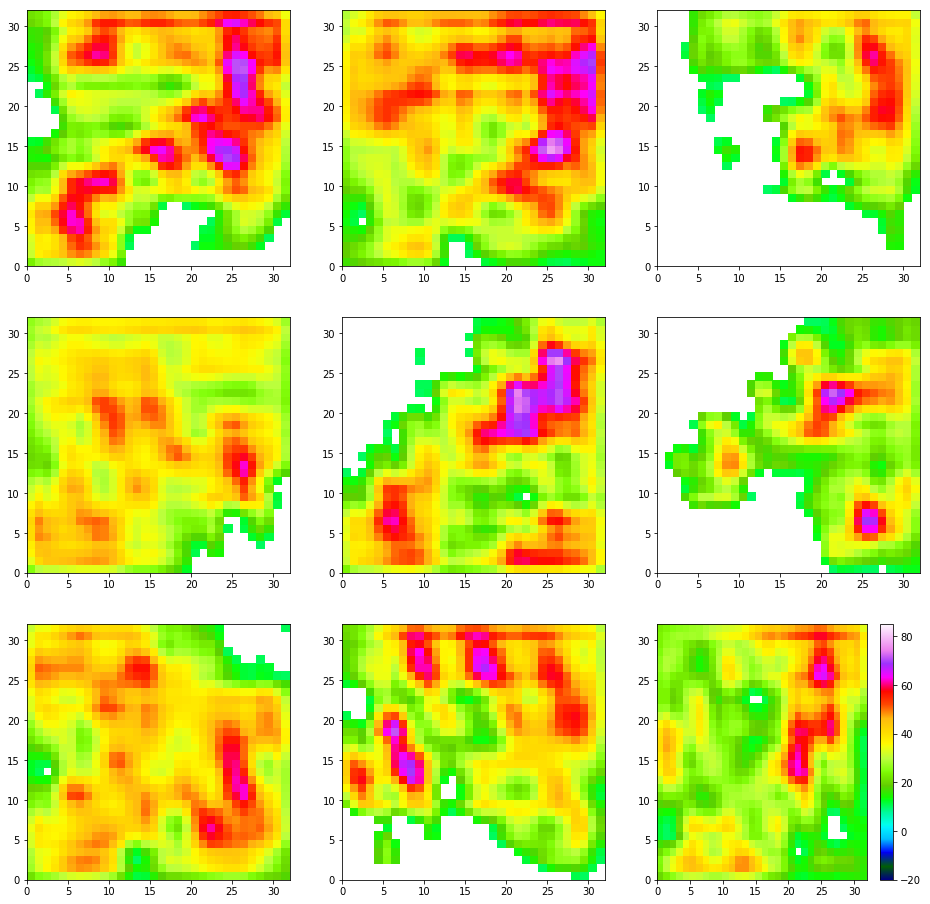

In [190]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
for a, ax in enumerate(axes.ravel()):
    scaled_sample = gen_samples[a, :, :, 0] * storm_scaling_values.iloc[0, 1] + storm_scaling_values.iloc[0, 0]
    pc = ax.pcolormesh(np.ma.array(scaled_sample, mask=scaled_sample <=10), 
                       vmin=-20, vmax=85, cmap="gist_ncar")
plt.colorbar(pc)

In [178]:
gen_samples[a, :, :, 0].min()

-1.609933

In [183]:
storm_norm_data.min()

-1.7845744